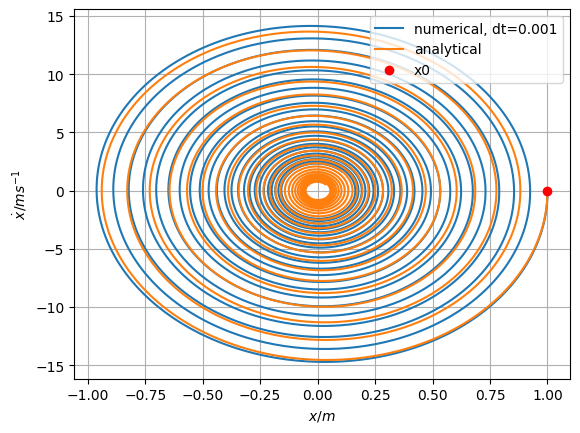

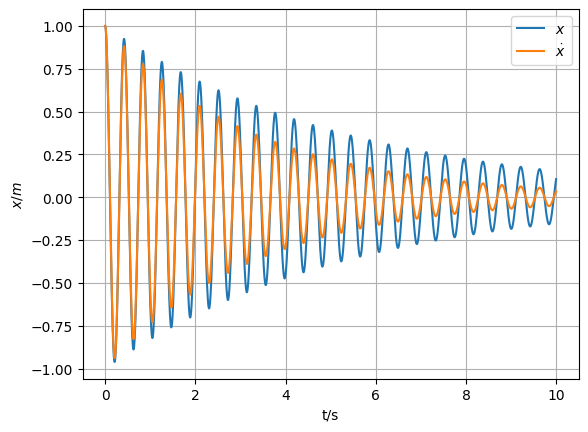

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

beta = 0.3 #s^-1
omega = 15 # in s^-1

M = np.array(
    [[0, 1],
    [-omega**2, -2*beta]])

def sim(M, x0, dt, T):
    x = x0
    X = []
    for t in np.arange(0, T, dt):
        x = x + dt * M @ x
        X.append(x)
    
    return np.array(X)
dt_val = 0.001

t=np.arange(0, 10, dt_val)

x0 = np.array([1, 0])
X = sim(M, x0, dt_val, 10)

#analytical solution
t_analytical = sp.symbols('t') 
x_analytical = sp.exp(-beta*t_analytical)*(sp.cos(omega*t_analytical) + (x0[1] +beta*x0[0])/omega*sp.sin(omega*t_analytical))
x_dot_analytical = sp.diff(x_analytical, t_analytical)
x_analytical = sp.lambdify(t_analytical, x_analytical)
x_dot_analytical = sp.lambdify(t_analytical, x_dot_analytical)

X_analytical = np.vstack([x_analytical(t), x_dot_analytical(t)]).T

plt.plot(X[:,0], X[:,1], label=f'numerical, dt={dt_val}')
plt.plot(x_analytical(t), x_dot_analytical(t), label='analytical')


# mark x0
plt.plot(x0[0], x0[1], 'ro', label='x0')
plt.grid()
plt.xlabel(r'$x /m$')
plt.ylabel(r'$\dot x /ms^{-1}$')
plt.legend()

plt.savefig('phase_space.png')
plt.show()
# plot e, g vs t
plt.plot(t, X[:,0], label=r'$x$')
plt.plot(t, X_analytical[:,0], label=r'$\dot x$')
#plt.plot(t, np.sin(t/dt_val), label='sampling frequency')

plt.grid()
plt.legend()

plt.xlabel('t/s')
plt.ylabel(r'$x/m$')
plt.savefig('x_vs_t.png')
plt.show()